<a href="https://colab.research.google.com/github/AhatOz/Analytics/blob/main/Lab_2.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [11]:
import math
import statistics
import numpy as np
import scipy
import scipy.stats as stats
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [12]:
import platform
print(platform.python_version())

3.7.12


In [13]:
scipy.version

<module 'scipy.version' from '/usr/local/lib/python3.7/dist-packages/scipy/version.py'>

In [14]:
# mount google drive
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [15]:
#the 2nd read option assume that the data file is rignt under your default google drive directory
data = pd.read_csv('drive/My Drive/Colab Notebooks/BUSHING_DIAMETER_2_BATCHES.csv', na_values=".")
#data = pd.read_csv('drive/My Drive/brain_size.csv', sep=';', na_values=".")
data  

,Batch 1,Batch 2
0,1.001,1.000
1,1.005,1.005
2,1.015,1.015
3,1.020,1.005
4,1.010,0.990
5,1.015,1.005
6,1.000,1.015
7,1.010,1.000
8,0.999,1.005
9,1.010,0.990


1) BATCH 1:

In [16]:

data['VIQ'] = data['Batch 1']
np.mean(data['VIQ'])


1.003359997312

In [17]:
np.std(data['VIQ'])

0.007636115751107523

In [18]:
np.min((data['VIQ']))

0.9850000143000001

In [19]:
np.max((data['VIQ']))

1.024999976

In [20]:
np.median((data['VIQ']))

1.001000047

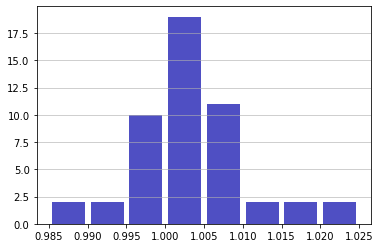

In [21]:
'''Histogram'''
plt.hist(data['VIQ'], bins='auto', 
        color='#0504aa', alpha=0.7, rwidth=0.85)
plt.grid(axis='y', alpha=0.75)

/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


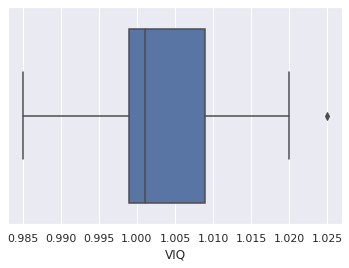

In [22]:
'''BoxPlot'''
sns.set(style='darkgrid')
sns.boxplot(data['VIQ'])


1) BATCH 2:

In [23]:
data['VIQ'] = data['Batch 2']
np.mean(data['VIQ'])


1.0036600040659995

In [24]:
np.std(data['VIQ'])

0.00715432595577404

In [25]:
np.min((data['VIQ']))

0.9900000095

In [26]:
np.max((data['VIQ']))

1.019000053

In [27]:
np.median((data['VIQ']))

1.004999995

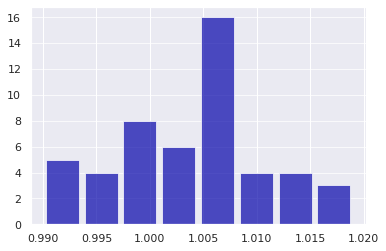

In [28]:
'''Histogram'''
plt.hist(data['VIQ'], bins='auto', 
        color='#0504aa', alpha=0.7, rwidth=0.85)
plt.grid(axis='y', alpha=0.75)

/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


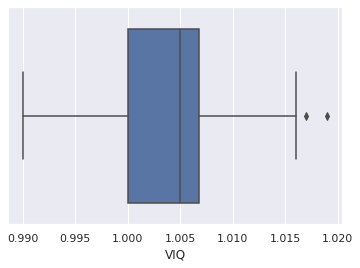

In [29]:
'''BoxPlot'''
sns.set(style='darkgrid')
sns.boxplot(data['VIQ'])


2) 
*   H0: μ1 = μ2 
*   HA: μ1 != μ2

where μ1:mean of batch 1 and μ2:mean of batch 2




In [31]:
#B) #tests of hypothesis on the means of two normal distributions, variance unknown
#two sample t-test
batch_1=data['Batch 1']
batch_2=data['Batch 2']
stats.ttest_ind(batch_1, batch_2)

Ttest_indResult(statistic=-0.20069318940070305, pvalue=0.84135440783743)

Since above pvalue is very high, I fail to reject H0.

C) Tests on variances of normal distributions(F-Test)

In [32]:
#F test for variances of two populations
# the following function is user defined
def f_test(x,y):
  x=np.array(x)
  y=np.array(y)
  f=np.var(x,ddof=1)/np.var(y, ddof=1) # cal F test statistic
  dfn=x.size-1
  dfd=y.size-1
  p=1-scipy.stats.f.cdf(f,dfn, dfd) #find p-value of F test statistics
  return f, p
batch_1=data['Batch 1']
batch_2=data['Batch 2']
f_test(batch_1, batch_2)

(1.139219892853115, 0.3250145066993082)

Since above pvalue is very high, I fail to reject H0.



D) Paired t-Test

In [33]:
#Paired t-Test method 1: using one sample t test
#Test if FISQ and PIQ are signficantly different
#The data for the pair (FISQ, PIQ) are obtained for the same subject 
diff=data['Batch 1']-data['Batch 2']
stats.ttest_1samp(diff, 0)


Ttest_1sampResult(statistic=-0.21092452524986072, pvalue=0.8338209112161077)

The above p-value is large, which suggests H0 can not be rejected.

In [34]:
#Paired t-Test method 2: using repeated measures test
#Test if FISQ and PIQ are signficantly different
#The data for the pair (FISQ, PIQ) are obtained for the same subject 

stats.ttest_rel(data['Batch 1'],data['Batch 2'])

Ttest_relResult(statistic=-0.21092452524986072, pvalue=0.8338209112161077)


The above p-value is large, which suggests H0 can not be rejected.


3) Ex 4.6

In [35]:
# A)
#left tailed test
# degrees of freedom = 25-1
scipy.stats.t.sf(abs(-2.80), df=24)

0.00496459063985459

In [36]:
#B) 
scipy.stats.t.sf(abs(-1.75), df=24)

0.046447544473094404

In [37]:
#C)
scipy.stats.t.sf(abs(-2.54), df=24)

0.008987349928309575

In [38]:
#D)
scipy.stats.t.sf(abs(-2.05), df=24)

0.025720976728562817

4) Ex 4.11

In [39]:
array = [13.3987, 13.3957, 13.3902, 13.4015, 13.4001, 13.3918, 13.3965, 13.3925, 13.3946, 13.4002]
array

[13.3987,
 13.3957,
 13.3902,
 13.4015,
 13.4001,
 13.3918,
 13.3965,
 13.3925,
 13.3946,
 13.4002]

*   H0: μ1 = 13.4
*   HA: μ1 != 13.4
*   alpha = 0.05

where μ1:mean





In [40]:
np.mean(array)

13.396180000000001

In [41]:
#(a)Test the hypothesis that mean thickness is13.4 × 1000 Å. Use a = 0.05 and assume a two-sided alternative.
stats.ttest_1samp(a=array, popmean=13.4)

Ttest_1sampResult(statistic=-3.0905771237069133, pvalue=0.012917430540578496)

Since pvalue is less than alpha value, H0 can be rejected with 95% confidence.



In [42]:
# (b) Find a 99% two-sided confidence interval on mean photoresist thickness. Assume that thickness is normally distributed.

stats.t.interval(alpha=0.99, df=len(array)-1, loc=np.mean(array), scale=stats.sem(array)) 


(13.392163154187317, 13.400196845812685)

In [43]:
# (c) Does the normality assumption seem reasonable for these data?